# Crash System Analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Connect-to-your-ArcGIS-Online-organization" data-toc-modified-id="Connect-to-your-ArcGIS-0nline-organization-1">Connect to your ArcGIS Online organization</a></span></li>
        <li><span><a href="#Obtain-data" data-toc-modified-id="Obtain-data-2">Obtain data</a></span></li>
        <li><span><a href="#Read-layer-as-pandas-dataframe" data-toc-modified-id="Read-layer-as-pandas-dataframe-3">Read layer as pandas dataframe</a></span></li>
        <li><span><a href="#Get-value-counts-for-each-column" data-toc-modified-id="Get-value-counts-for-each-column-4">Get value counts for each column</a></span></li>
        <li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-5">Visualizations</a></span></li>
        <li><span><a href="#Analyze-reason-for-the-cause-of-accidents" data-toc-modified-id="Analyze-reason-for-the-cause-of-accidents-6">Analyze reason for the cause of accidents</a></span></li>
        <li><span><a href="#Dangerous-road-in-New-Zealand" data-toc-modified-id="Dangerous-road-in-New-Zealand-7">Dangerous road in New Zealand</a></span></li>
        <li><span><a href="#Why-is-it-dangerous" data-toc-modified-id="Why-is-it-dangerous-8">Why is it dangerous</a></span></li>
        <li><span><a href="#Total-Vs-Serious-crashes-by-year" data-toc-modified-id="Total-Vs-Serious-crashes-by-year-9">Total Vs Serious crashes by year</a></span></li>
        <li><span><a href="#Let's-visualize-the-most-dangerous-areas-on-the-map" data-toc-modified-id="Let's-visualize-the-most-dangerous-areas-on-the-map-10">Let's visualize the most dangerous areas on the map</a></span></li>
    </ul>
</div>

### Connect to your ArcGIS Online organization

In [2]:
from arcgis.gis import GIS

In [3]:
gis = GIS("https://deldev.maps.arcgis.com", "demos_deldev", "DelDevs12")

### Obtain data

Let's searchCrash Analysis System (CAS) data using the search() method from the content property of your gis object.you can pass a parameter outside_org=True to access the contents outside your organization.

In [4]:
data = gis.content.search('title:Crash Analysis System (CAS) data', 'Feature layer', outside_org=True)

<Item title:"Crash Analysis System (CAS) data" type:Feature Layer Collection owner:Open.Data_NZTA>
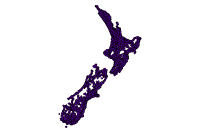

In [5]:
from IPython.display import display

for item in data:
    display(item)

In [5]:
crash_item = data[0]

In [6]:
crash_lyr = crash_item.layers[0]

### Read layer as pandas dataframe

Using from_layer method, feature layers can be easiy read as sedf

In [9]:
import pandas as pd
sedf = pd.DataFrame.spatial.from_layer(crash_lyr)

In [65]:
sedf.head(10)

,OBJECTID,Pedestrian,SHAPE,advisorySpeed,animals,areaUnitID,bicycle,bridge,bus,carStationWagon,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1,0,"{""x"": 1768156, ""y"": 5907851, ""spatialReference...",0,0,523502,0,0,0,1,...,0,0,0,0,Urban,0,0,0,Fine,Unknown
1,2,0,"{""x"": 1673798, ""y"": 6079431, ""spatialReference...",0,0,501700,0,0,0,1,...,0,0,0,0,Openroad,1,0,0,Fine,Unknown
2,3,0,"{""x"": 1828460, ""y"": 5796852, ""spatialReference...",0,0,535241,0,0,0,2,...,0,0,0,0,Openroad,0,0,0,Fine,Unknown
3,4,0,"{""x"": 1847867, ""y"": 5686127, ""spatialReference...",0,0,541343,0,0,0,2,...,0,0,0,0,Openroad,0,0,0,Fine,Unknown
4,5,0,"{""x"": 1924593, ""y"": 5778387, ""spatialReference...",0,0,542600,0,0,0,2,...,0,0,0,0,Urban,0,0,0,Fine,Unknown
5,6,0,"{""x"": 1744879, ""y"": 5973996, ""spatialReference...",0,0,506615,0,0,0,1,...,0,0,0,0,Openroad,1,0,0,Light Rain,Unknown
6,7,0,"{""x"": 1846588, ""y"": 5736734, ""spatialReference...",0,0,541320,0,0,0,0,...,0,0,0,0,Openroad,1,0,0,Fine,Unknown
7,8,1,"{""x"": 1757040, ""y"": 5919442, ""spatialReference...",0,0,514200,0,0,0,1,...,0,0,0,0,Urban,0,0,0,Fine,Unknown
8,9,1,"{""x"": 1879039, ""y"": 5823785, ""spatialReference...",0,0,538201,0,0,0,1,...,0,0,0,0,Urban,0,0,0,Fine,Unknown
9,10,0,"{""x"": 1756314, ""y"": 5920720, ""spatialReference...",0,0,514102,0,0,0,0,...,0,0,0,0,Openroad,1,0,0,Fine,Unknown


In [10]:
# sedf.to_csv('cas.csv')

In [92]:
sedf['incident'] = 1 #for use later

In [15]:
sedf.columns

Index(['Unnamed: 0', 'OBJECTID', 'Pedestrian', 'SHAPE', 'advisorySpeed',
       'animals', 'areaUnitID', 'bicycle', 'bridge', 'bus', 'carStationWagon',
       'cliffBank', 'cornerRoadSideRoad', 'crashDirectionDescription',
       'crashDistance', 'crashFinancialYear', 'crashLocation1',
       'crashLocation2', 'crashRPDirectionDescription', 'crashRPDisplacement',
       'crashRPNewsDescription', 'crashRPRS', 'crashRPSH',
       'crashSHDescription', 'crashSeverity', 'crashYear', 'darkLight',
       'debris', 'directionRoleDescription', 'ditch', 'easting', 'fatalCount',
       'fence', 'flatHill', 'guardRail', 'holiday', 'houseBuilding',
       'intersection', 'intersectionMidblock', 'junctionType', 'kerb', 'light',
       'meshblockID', 'minorInjuryCount', 'moped', 'motorcycle',
       'multiVehicle', 'northing', 'numberOfLanes', 'objectThrownOrDropped',
       'other', 'otherVehicleType', 'outdatedLocationDescription', 'overBank',
       'parkedVehicle', 'phoneBoxEtc', 'postOrPole', '

### Get value counts for each column 

In [18]:
sedf.crashSeverity.value_counts() #non-injurious, minor, serious, fatal

N    474328
M    148575
S     36831
F      6113
Name: crashSeverity, dtype: int64

In [28]:
100*(sedf.crashSeverity.value_counts()[0]/sedf.crashSeverity.value_counts().sum())

71.23678562792955

Of all the accidents that take place 71% are non injurious.We will further explore the reason behind these accidents.

In [19]:
sedf.advisorySpeed.value_counts() # advisorySpeed gives warning sign at sharp curves, exits, or exit ramps.

0     642347
65      3974
55      3372
45      3208
75      2838
35      2773
85      1331
30      1313
25      1011
80       676
50       640
40       623
70       561
20       421
60       284
15       202
90       153
95       120
Name: advisorySpeed, dtype: int64

In [22]:
sedf.animals.value_counts() # hw many times an 'Animal(s)' was struck in a crash

0    665716
1       130
2         1
Name: animals, dtype: int64

In [40]:
sedf.bicycle.value_counts() # how many bicycles were involved in a crash

0    646963
1     18616
2       240
3        17
4         8
5         3
Name: bicycle, dtype: int64

In [27]:
100*(sedf.bicycle.value_counts()[0]/sedf.bicycle.value_counts().sum())

97.1639130310717

97% times no bicycles was involved in a crash.Bicycling seems to be safe in New Zealand

In [32]:
sedf.crashFinancialYear.value_counts()

2007/2008    41109
2006/2007    40816
2017/2018    38897
2008/2009    38814
2005/2006    38707
2016/2017    38600
2002/2003    38085
2004/2005    38048
2001/2002    37391
2003/2004    37233
2009/2010    37202
2010/2011    35412
2015/2016    34516
2000/2001    33686
2011/2012    30697
2014/2015    30613
2012/2013    30000
2013/2014    29970
1999/2000    16051
Name: crashFinancialYear, dtype: int64

By using the argmax() function we can find the financial year with most crashes.

In [33]:
sedf.crashFinancialYear.value_counts().argmax()

C:\Users\priyanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


'2007/2008'

In [43]:
sedf.crashDirectionDescription.value_counts()

         250966
South    126055
North    122549
West      83641
East      82635
0             1
Name: crashDirectionDescription, dtype: int64

In [49]:
sedf.crashRPNewsDescription.value_counts()

0             621704
Northbound     18590
Southbound     18322
Westbound       3914
Eastbound       3317
Name: crashRPNewsDescription, dtype: int64

In [50]:
sedf.junctionType.value_counts()

Unknown            334720
T Type Junction    143069
X Type Junction     85577
Driveway            56378
Roundabout          32030
Y Type Junction      8136
Multi Rd Join        5937
Name: junctionType, dtype: int64

ignnoring the data with unknown values,accidents majorly occur at a T type junction.

In [51]:
sedf.slipFlood.value_counts()

0    665241
1       599
2         6
4         1
Name: slipFlood, dtype: int64

In [52]:
sedf.parkedVehicle.value_counts()

0    602965
1     60128
2      2381
3       320
4        46
5         7
Name: parkedVehicle, dtype: int64

In [53]:
sedf.roadWet.value_counts()

Dry          489351
Wet          166403
Ice/ Snow      6582
Unknown        3511
Name: roadWet, dtype: int64

In [54]:
sedf.speedLimit.value_counts()

050    408041
100    183023
080     29367
070     21282
060     15828
030      5104
020      1680
040       817
010       443
090       236
LSZ        10
015         5
110         5
005         3
            3
Name: speedLimit, dtype: int64

In [56]:
sedf.trafficControl.value_counts()

Nil               284669
N/A               153349
Give Way Sign     118520
Traffic Signal     67918
Stop Sign          40991
School Patrol        319
Points Man            81
Name: trafficControl, dtype: int64

In [57]:
sedf.darkLight.value_counts()

Light      453474
Dark       211244
Unknown      1129
Name: darkLight, dtype: int64

In [58]:
sedf.light.value_counts()

Bright Sun    250531
Overcast      202943
Dark          180214
Twilight       31030
Unknown         1129
Name: light, dtype: int64

In [59]:
sedf.weatherA.value_counts()

Fine          517258
Light Rain    102289
Heavy Rain     28156
Mist            8950
Unknown         7761
Snow            1433
Name: weatherA, dtype: int64

In [60]:
sedf.roadworks.value_counts()

0    665326
1       508
2        13
Name: roadworks, dtype: int64

In [61]:
sedf.strayAnimal.value_counts()

0    659604
1      6129
2       104
3         9
4         1
Name: strayAnimal, dtype: int64

In [62]:
sedf.crashYear.value_counts()

2007    41651
2006    39769
2008    39523
2017    39004
2005    38354
2009    38238
2002    38030
2003    37942
2016    37082
2004    37042
2010    36868
2001    36114
2011    32445
2015    32128
2000    31982
2012    30435
2013    30102
2014    29793
2018    19345
Name: crashYear, dtype: int64

### Visualizations

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

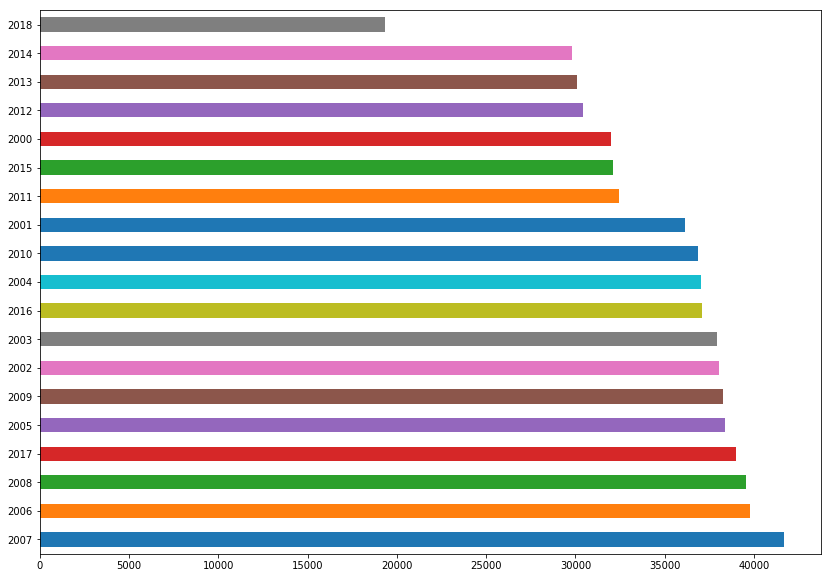

In [36]:
sedf.crashYear.value_counts().plot(kind='barh', figsize=(14, 10))

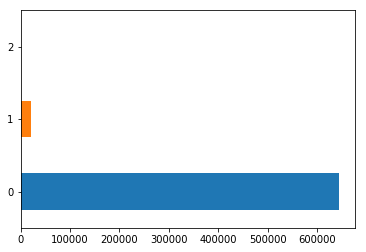

In [37]:
sedf.Pedestrian.value_counts().plot(kind='Barh')

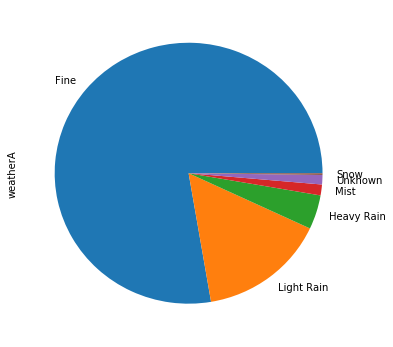

In [38]:
sedf['weatherA'].value_counts().plot(kind='pie', figsize=(6,6))

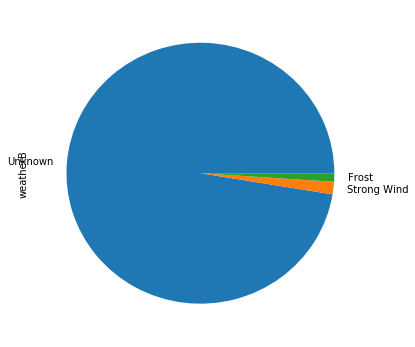

In [39]:
sedf['weatherB'].value_counts().plot(kind='pie', figsize=(6,6))

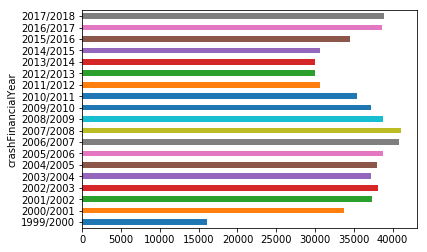

In [40]:
sedf.groupby('crashFinancialYear').count().fatalCount.plot(kind='barh')

### Analyze reason for the cause of accidents

Lets see if roadCurvature is the cause of most accidents

In [22]:
sedf.roadCurvature.unique()

array(['Easy Curve', 'Straight Road', 'Moderate Curve', 'Severe Curve',
       'Unknown'], dtype=object)

In [41]:
sedf.groupby(['roadCurvature', 'fatalCount'])['incident'].count()

roadCurvature   fatalCount
Easy Curve      0              94842
                1               1218
                2                129
                3                 25
                4                  9
                5                  1
                6                  2
                9                  1
Moderate Curve  0              89344
                1               1374
                2                125
                3                 24
                4                  9
                5                  1
                6                  1
                7                  1
Severe Curve    0              19411
                1                162
                2                 12
                3                  2
Straight Road   0             456132
                1               2754
                2                196
                3                 49
                4                 16
                5                  2
Unknown    

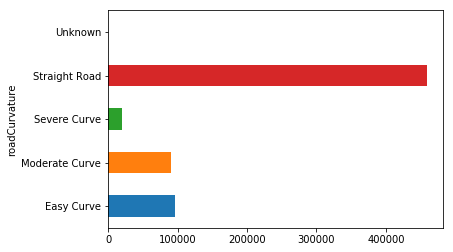

In [42]:
sedf.groupby('roadCurvature').count().fatalCount.plot(kind='barh')

In [44]:
import numpy as np

In [47]:
sedf.groupby(['roadCurvature', 'crashSeverity'])['incident'].aggregate(np.sum).unstack()

crashSeverity,F,M,N,S
roadCurvature,,,,
Easy Curve,1385.0,22061.0,66576.0,6205.0
Moderate Curve,1535.0,22536.0,59466.0,7342.0
Severe Curve,176.0,4337.0,13605.0,1469.0
Straight Road,3017.0,99640.0,334677.0,21815.0
Unknown,NaN,1.0,4.0,NaN


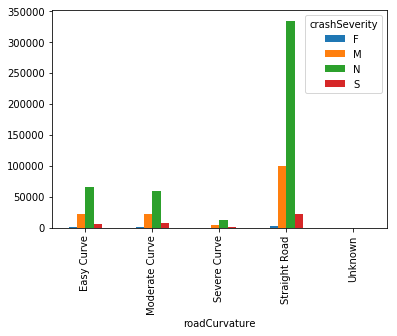

In [46]:
sedf.groupby(['roadCurvature', 'crashSeverity'])['incident'].aggregate(np.sum).unstack().plot(kind='bar')

Lets find out the reason of accident on straight road

In [107]:
sedf[sedf['roadCurvature'] == 'Straight Road']

,Unnamed: 0,OBJECTID,Pedestrian,SHAPE,advisorySpeed,animals,areaUnitID,bicycle,bridge,bus,...,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB,incident,year
YEAR,,,,,,,,,,,,,,,,,,,,,
2000-01-01,1,2,0,"{'x': 1673798, 'y': 6079431, 'spatialReference...",0,0,501700,0,0,0,...,0,0,Openroad,1,0,0,Fine,Unknown,1,2000
2000-01-01,2,3,0,"{'x': 1828460, 'y': 5796852, 'spatialReference...",0,0,535241,0,0,0,...,0,0,Openroad,0,0,0,Fine,Unknown,1,2000
2000-01-01,3,4,0,"{'x': 1847867, 'y': 5686127, 'spatialReference...",0,0,541343,0,0,0,...,0,0,Openroad,0,0,0,Fine,Unknown,1,2000
2000-01-01,4,5,0,"{'x': 1924593, 'y': 5778387, 'spatialReference...",0,0,542600,0,0,0,...,0,0,Urban,0,0,0,Fine,Unknown,1,2000
2000-01-01,7,8,1,"{'x': 1757040, 'y': 5919442, 'spatialReference...",0,0,514200,0,0,0,...,0,0,Urban,0,0,0,Fine,Unknown,1,2000
2000-01-01,8,9,1,"{'x': 1879039, 'y': 5823785, 'spatialReference...",0,0,538201,0,0,0,...,0,0,Urban,0,0,0,Fine,Unknown,1,2000
2000-01-01,10,11,0,"{'x': 1820983, 'y': 5836001, 'spatialReference...",0,0,534500,1,0,0,...,1,0,Openroad,0,0,0,Fine,Unknown,1,2000
2000-01-01,15,16,0,"{'x': 1759828, 'y': 5912260, 'spatialReference...",0,0,520000,0,0,0,...,0,0,Urban,1,0,0,Fine,Unknown,1,2000
2000-01-01,16,17,1,"{'x': 1734477, 'y': 5980912, 'spatialReference...",0,0,506615,0,0,0,...,0,0,Openroad,1,0,0,Fine,Unknown,1,2000


In [105]:
sedf[sedf['roadCurvature'] == 'Straight Road'].groupby('urban')['incident'].count()

urban
Openroad    109296
Unknown          1
Urban       349852
Name: incident, dtype: int64

A straight road with openroad(sed_lim>80) ha more accidents.Probably the speed limit for openroads need to be changed

In [104]:
sedf[sedf['roadCurvature'] == 'Straight Road'].groupby('junctionType')['incident'].count()

junctionType
Driveway            48509
Multi Rd Join        4007
Roundabout          16311
T Type Junction    106154
Unknown            203772
X Type Junction     76764
Y Type Junction      3632
Name: incident, dtype: int64

Most accident on a straight road takes place on a T type junction.

In [55]:
grp_df = sedf[sedf['roadCurvature'] == 'Straight Road'].groupby(['junctionType', 'weatherA'])['incident'].count().unstack()

In [56]:
grp_df

weatherA,Fine,Heavy Rain,Light Rain,Mist,Snow,Unknown
junctionType,,,,,,
Driveway,40761.0,1223.0,5619.0,300.0,29.0,577.0
Multi Rd Join,3216.0,124.0,552.0,37.0,2.0,76.0
Roundabout,13178.0,536.0,2258.0,153.0,11.0,175.0
T Type Junction,85078.0,3600.0,14989.0,1097.0,87.0,1303.0
Unknown,164073.0,7632.0,26400.0,2480.0,543.0,2644.0
X Type Junction,61548.0,2789.0,10976.0,635.0,76.0,740.0
Y Type Junction,2794.0,198.0,564.0,31.0,NaN,45.0


In [57]:
grp_df.drop('Unknown', axis=0, inplace=True)

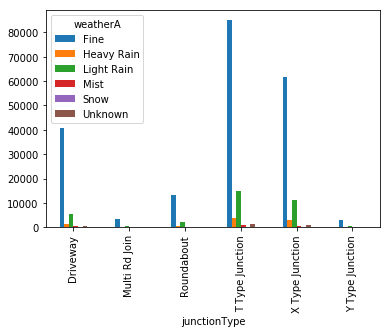

In [58]:
grp_df.plot(kind='bar')
plt.show()

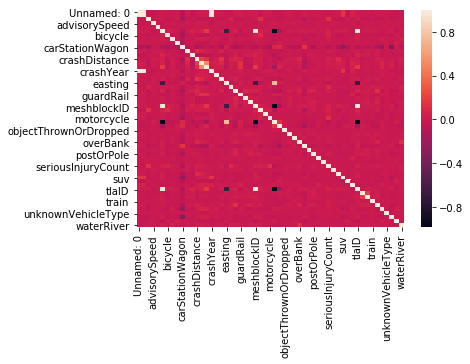

In [5]:
import seaborn as sns
sns.heatmap(sedf[sedf['roadCurvature'] == 'Straight Road'].corr(), square=False)

In [64]:
gpdf = sedf[sedf['roadCurvature'] == 'Straight Road'].groupby(['junctionType', 'weatherB'])['incident'].count().unstack()

In [65]:
gpdf

weatherB,Frost,Strong Wind,Unknown
junctionType,,,
Driveway,141,420,47948
Multi Rd Join,13,21,3973
Roundabout,77,167,16067
T Type Junction,455,1085,104614
Unknown,2237,3611,197924
X Type Junction,309,821,75634
Y Type Junction,6,40,3586


In [66]:
gpdf.drop('Unknown', axis=1, inplace=True)

In [68]:
gpdf.drop('Unknown', axis=0, inplace=True)

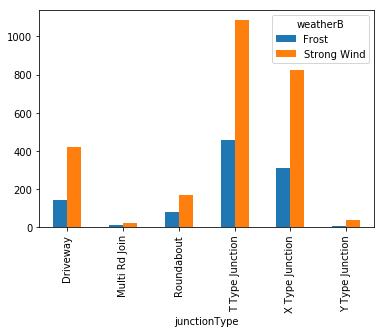

In [69]:
gpdf.plot(kind='bar')
plt.show()

on a straight road most accidents take place due to strong wind.

Trend of accidents over a period of 2000-2018

In [70]:
sedf['YEAR'] = pd.to_datetime(sedf.crashYear, format='%Y')

In [71]:
sedf['year'] = sedf['YEAR'].dt.year

In [72]:
sedf.set_index('YEAR', inplace=True)

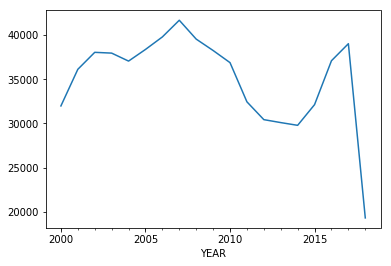

In [74]:
sedf['incident'].resample('Y').sum().plot()

Accidents have decreased since 2015

In [98]:
sedf.crashYear.dtype

dtype('int64')

### Dangerous road in New Zealand

In [109]:
sedf.groupby('crashLocation1')['incident'].count().sort_values(ascending=False)

crashLocation1
SH 1N                   53787
SH 2                    19250
SH 1S                   17308
SH 3                    10254
SH 6                     9435
GREAT SOUTH ROAD         8530
SH 16                    7694
GREAT NORTH ROAD         5274
SH 5                     3980
SH 20                    2920
DOMINION ROAD            2725
SH 30                    2541
SH 8                     2479
SH 25                    2212
QUEEN ST                 2207
SH 29                    2192
VICTORIA ST              2176
SH 4                     2119
NEW NORTH ROAD           2093
LINCOLN ROAD             1950
HIGH ST                  1803
TI RAKAU DRIVE           1751
SH 12                    1688
LAKE ROAD                1642
MOUNT ALBERT ROAD        1632
CAMERON ROAD             1626
CHURCH ST                1600
EAST COAST ROAD          1595
SH 35                    1573
SH 73                    1571
                        ...  
KAWHATAU VALLEY ROAD        1
KAWERAU AVENUE           

State Highway 1(North Island) is the most dangerous road in New Zealand

### Why is it dangerous

In [76]:
sh_df = sedf[sedf['crashLocation1'] == 'SH 1N']

In [79]:
sh_df.shape

(53787, 91)

In [193]:
sh_df.urban.unique()

array(['Openroad', 'Urban', 'Unknown'], dtype=object)

In [77]:
sh_df[sh_df['urban'] == 'Openroad'].shape[0]

45256

In [82]:
100*(sh_df[sh_df['urban'] == 'Openroad'].shape[0]/len(sh_df))

84.13929016305055

Of all the accidents o straight roads, 84% happn on open roads

openroad is a road(highway) with speed limt > 80.

In [102]:
sedf.groupby('holiday')['incident'].count()

holiday
Christmas/New Year     16739
Easter                  8049
Labour Weekend          5652
None                  628900
Queens Birthday         6507
Name: incident, dtype: int64

In [94]:
sedf.groupby('holiday')['incident'].count().sort_values(ascending=False)

holiday
None                  628900
Christmas/New Year     16739
Easter                  8049
Queens Birthday         6507
Labour Weekend          5652
Name: incident, dtype: int64

In [99]:
100*(sedf.groupby('holiday')['incident'].count().sort_values(ascending=False)[-4:].sum())/len(sedf)

5.548872338540235

Only 5 percent of the accidents happen on a holiday which which means holidays is nt a reaon for more accidents.

In [111]:
sh_df.groupby('light')['incident'].count()

light
Bright Sun    19589
Dark          13781
Overcast      17916
Twilight       2430
Unknown          71
Name: incident, dtype: int64

In [113]:
100*(sh_df.groupby('light')['incident'].count()[0]/len(sh_df))

36.419580939632255

36 percents of the accidents on a straight road happened when there was bright sun.

In [122]:
sedf[sedf['urban'] == 'Openroad'].groupby('speedLimit')['incident'].count().sort_values(ascending=False)

speedLimit
100    170843
80      28159
100     12180
080      1208
90        227
LSZ        10
090         9
110         4
110         1
Name: incident, dtype: int64

The data has some rows with speed limit as integer value and others with string value.So we have two value counts for '100' speed limit.(170843+12180) is the actual count by speed limit of 100km/h.

most of the open roads have a spped limit of 100km/h 

Get count by crashseverity on SH 1N

In [125]:
sedf.groupby('crashLocation1')['incident'].count().sort_values(ascending=False)[:10]

crashLocation1
SH 1N               53787
SH 2                19250
SH 1S               17308
SH 3                10254
SH 6                 9435
GREAT SOUTH ROAD     8530
SH 16                7694
GREAT NORTH ROAD     5274
SH 5                 3980
SH 20                2920
Name: incident, dtype: int64

In [126]:
sedf[sedf.crashLocation1 == 'SH 1N'].groupby('crashSeverity')['incident'].count()

crashSeverity
F      695
M    10912
N    40069
S     2111
Name: incident, dtype: int64

In [127]:
sedf[sedf['crashLocation1'] == 'SH 1N'].groupby('streetLight').count()

,Unnamed: 0,OBJECTID,Pedestrian,SHAPE,advisorySpeed,animals,areaUnitID,bicycle,bridge,bus,...,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB,incident,year
streetLight,,,,,,,,,,,,,,,,,,,,,
None,8757,8757,8757,8757,8757,8757,8757,8757,8757,8757,...,8757,8757,8757,8757,8757,8757,8757,8757,8757,8757
Off,17140,17140,17140,17140,17140,17140,17140,17140,17140,17140,...,17140,17140,17140,17140,17140,17140,17140,17140,17140,17140
On,10941,10941,10941,10941,10941,10941,10941,10941,10941,10941,...,10941,10941,10941,10941,10941,10941,10941,10941,10941,10941
Unknown,16949,16949,16949,16949,16949,16949,16949,16949,16949,16949,...,16949,16949,16949,16949,16949,16949,16949,16949,16949,16949


Ignoring the number of unknown data, accident is more prone to happen if the street light is off.

In [128]:
sedf[sedf['crashLocation1'] == 'SH 1N'].groupby('junctionType')['incident'].count().sort_values(ascending=False)

junctionType
Unknown            42872
T Type Junction     4582
Y Type Junction     2023
X Type Junction     1705
Driveway            1364
Roundabout          1020
Multi Rd Join        221
Name: incident, dtype: int64

T Type Junction on SH 1N has more accidents.

In [130]:
sedf[sedf['crashLocation1'] == 'SH 1N'].groupby('intersection')['incident'].count()

intersection
At Landmark      1581
Intersection     8262
Unknown         43944
Name: incident, dtype: int64

High speed at the intersection of SH 1N highway would probably cause loss of vehicle control 

In [139]:
sedf[sedf['crashLocation1'] == 'SH 1N'].groupby('roadMarkings')['incident'].count()

roadMarkings
0                       1
Centre Line         32524
No Marks             6558
No Passing Lines     4583
Painted Island       1672
Ped Crossing          135
Raised Island        8028
Unknown               286
Name: incident, dtype: int64

### Total Vs Serious crashes by year

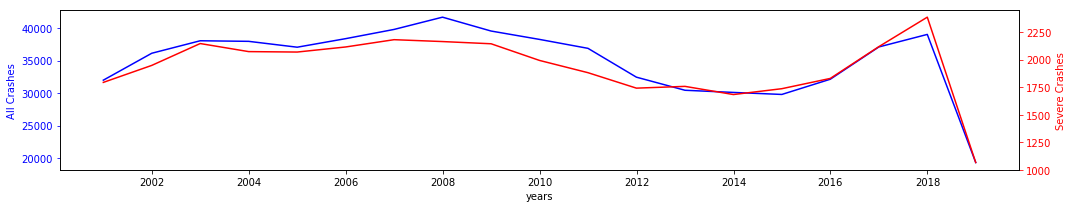

In [356]:
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(sedf['incident'].resample('Y').sum(), 'b-')
ax1.set_xlabel('years')
ax1.set_ylabel('All Crashes', color='b')
ax1.tick_params('y', colors='b')
# Make the y-axis label, ticks and tick labels match the line color.


ax2 = ax1.twinx()
ax2.plot(sedf[sedf.crashSeverity=='S']['incident'].resample('Y').sum(), 'r-')
ax2.set_ylabel('Severe Crashes', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

### Let's visualize the most dangerous areas on the map

Aggregate all the crashes that occured in 2017 

In [43]:
boundry = gis.content.search('New Zealand Territorial Authority Boundaries 2016 ', 'Feature layer', outside_org=True)

In [44]:
item = boundry[0]

In [45]:
boundry_lyr = item.layers[1]

In [39]:
crash_lyr.filter = 'crashYear = 2017'

<Item title:"New Zealand Territorial Authority Boundaries 2016" type:Feature Layer Collection owner:esri_dm>
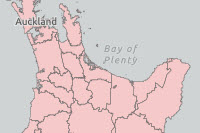

In [40]:
item

In [42]:
from arcgis.features.analysis import aggregate_points

In [46]:
agg_lyr = aggregate_points(crash_lyr, boundry_lyr, output_name='aggregate_crashes_2017')

In [47]:
agg_lyr

<Item title:"aggregate_crashes_2017" type:Feature Layer Collection owner:demos_deldev>

MapView(layout=Layout(height='400px', width='100%'))


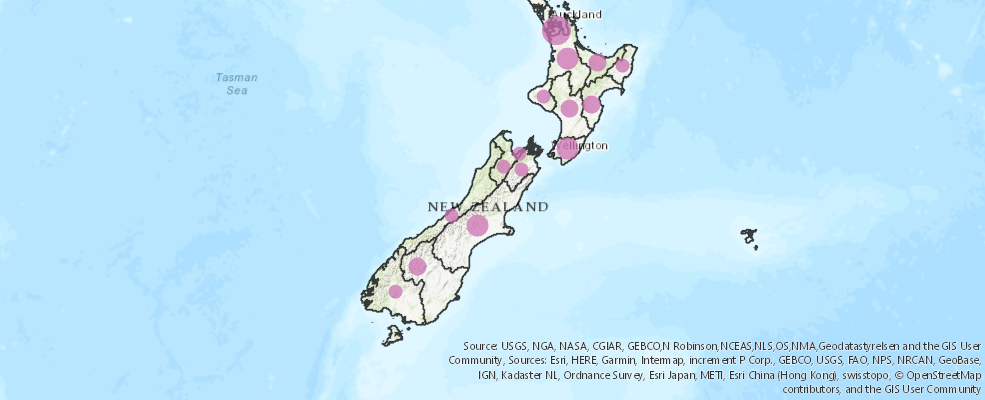

In [48]:
m1 = gis.map('new zealand')
m1

In [49]:
m1.add_layer(agg_lyr)

Th map shows crash count in each region.Aukland seems to be having the largest number of crashes. 

Let's create a hot spot analysis to see which areas need to be patroled by traffic police

In [33]:
from arcgis.features.analyze_patterns import find_hot_spots

In [51]:
crash_hot_spots = find_hot_spots(crash_lyr, bounding_polygon_layer=boundry_lyr, output_name='Crash_hot_spots_2017')

MapView(layout=Layout(height='400px', width='100%'))


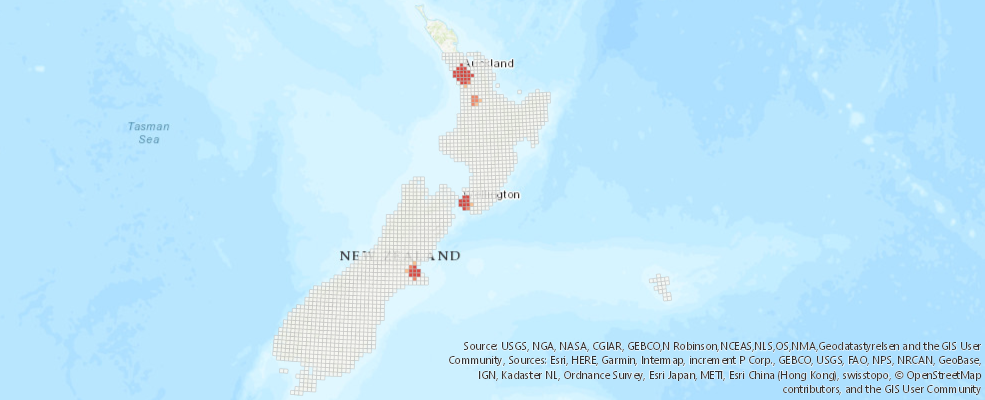

In [53]:
m2 = gis.map('new zealand')
m2

In [54]:
m2.add_layer(crash_hot_spots)

Wow!! Now that you have seen the hot spots of crashes.Be careful while you drive.